# Logistic Regression for a Multi-Label Classification of Images

## import library

In [1]:
import os
import torch
from torchvision import transforms
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torch import nn
import matplotlib.pyplot as plt
import statistics
from mydataset import MyDataset
from mymodel import MyModel
import mytrain
import myinfo

## construct dataset 

In [2]:
dir_dataset         = './data/mnist'
transform           = transforms.ToTensor()
root_dataset_train  = os.path.join(dir_dataset, 'train')
root_dataset_test   = os.path.join(dir_dataset, 'test')
dataset_train       = MyDataset(root_dataset_train, transform)
dataset_test        = MyDataset(root_dataset_test, transform)

## construct dataloader

In [3]:
batch_size_train    = mytrain.get_batch_size()
batch_size_test     = mytrain.get_batch_size()
dataloader_train    = DataLoader(dataset_train, batch_size=batch_size_train, drop_last=True, shuffle=True)
dataloader_test     = DataLoader(dataset_test, batch_size=batch_size_test, drop_last=False, shuffle=False)

## plot the dataset

In [4]:
iter_data_train             = iter(dataloader_train)
iter_data_test              = iter(dataloader_test)
(data_train, label_train)   = next(iter_data_train)
(data_test, label_test)     = next(iter_data_test)

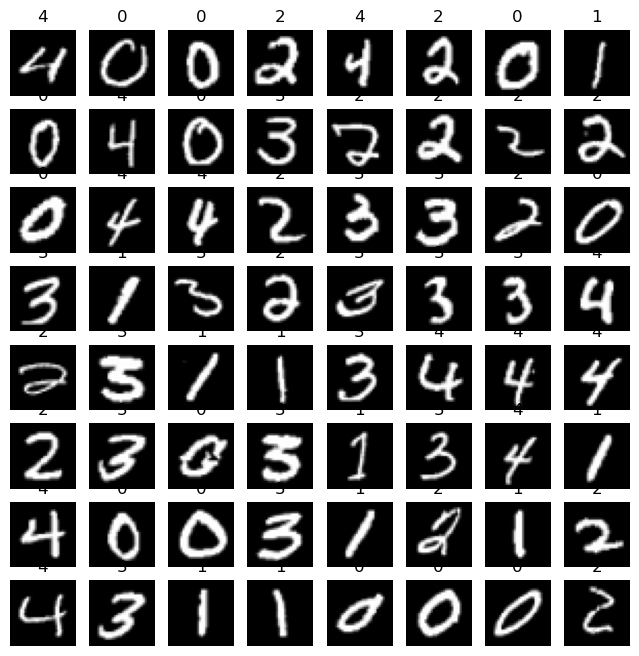

In [5]:
nRow    = min(int(torch.sqrt(torch.Tensor([batch_size_train])).item()), 8)
nCol    = nRow
plt.figure(figsize=(nRow, nCol))
for i in range(nRow):
    for j in range(nCol):
        idx = nCol * i + j
        plt.subplot(nRow, nCol, idx+1)
        plt.axis('off')
        plt.title(f'{int(label_train[idx])}')
        plt.imshow(data_train[idx].squeeze(0), cmap='gray')
plt.show()

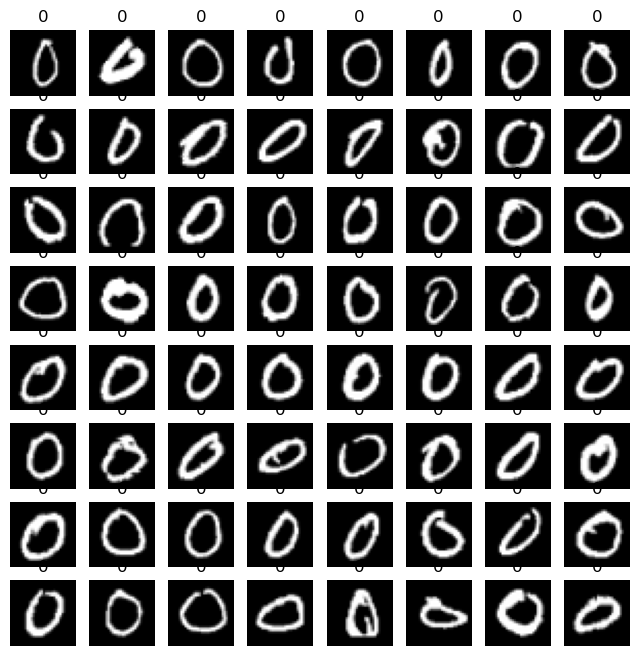

In [6]:
nRow    = min(int(torch.sqrt(torch.Tensor([batch_size_test])).item()), 8)
nCol    = nRow 
plt.figure(figsize=(nRow, nCol))
for i in range(nRow):
    for j in range(nCol):
        idx = nCol * i + j
        plt.subplot(nRow, nCol, idx+1)
        plt.axis('off')
        plt.title(f'{int(label_test[idx])}')
        plt.imshow(data_test[idx].squeeze(0), cmap='gray')
plt.show()

## construct model

In [7]:
num_class   = 5 
model       = MyModel(in_channels=1, out_labels=num_class)
pred_train  = model(data_train)
pred_test   = model(data_test)
print('train data size =', data_train.shape, ', train data type =', data_train.dtype)
print('test data size =', data_test.shape, ', test data type =', data_test.dtype)
print('train label size =', label_train.shape, ', train label type =', label_train.dtype)
print('test label size =', label_test.shape, ', test label type =', label_test.dtype)
print('train pred size =', pred_train.shape, ', train pred type =', pred_train.dtype)
print('test pred size =', pred_test.shape, ', test pred type =', pred_test.dtype)
print(label_train)
print(label_test)
print(pred_train[0,:])
print(pred_test[0,:])

train data size = torch.Size([100, 1, 32, 32]) , train data type = torch.float32
test data size = torch.Size([100, 1, 32, 32]) , test data type = torch.float32
train label size = torch.Size([100]) , train label type = torch.uint8
test label size = torch.Size([100]) , test label type = torch.uint8
train pred size = torch.Size([100, 5]) , train pred type = torch.float32
test pred size = torch.Size([100, 5]) , test pred type = torch.float32
tensor([4, 0, 0, 2, 4, 2, 0, 1, 0, 4, 0, 3, 2, 2, 2, 2, 0, 4, 4, 2, 3, 3, 2, 0,
        3, 1, 3, 2, 3, 3, 3, 4, 2, 3, 1, 1, 3, 4, 4, 4, 2, 3, 0, 3, 1, 3, 4, 1,
        4, 0, 0, 3, 1, 2, 1, 2, 4, 3, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 3, 2, 1, 4,
        2, 0, 4, 2, 4, 4, 1, 2, 4, 1, 0, 2, 4, 4, 0, 4, 4, 2, 2, 2, 4, 3, 0, 4,
        3, 0, 2, 1], dtype=torch.uint8)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## training

In [ ]:
model           = MyModel(in_channels=1, out_labels=num_class)
trainer         = mytrain.Trainer(model, num_class)
num_batch_train = len(dataloader_train)
progress_bar    = tqdm(total=mytrain.get_num_epoch() * num_batch_train)

loss_epoch_train        = []
loss_epoch_test         = []
accuracy_epoch_train    = []
accuracy_epoch_test     = []

for epoch in range(mytrain.get_num_epoch()):
    loss_iter_train     = []
    loss_iter_test      = []
    accuracy_iter_train = []
    accuracy_iter_test  = []
   
    # training loss and training accuracy 
    for step, (data, label) in enumerate(dataloader_train):
        progress_bar.update(1)
        (loss, accuracy) = trainer.train(data, label)
        loss_iter_train.append(loss)
        accuracy_iter_train.append(accuracy)

    # testing loss and testing accuracy 
    for step, (data, label) in enumerate(dataloader_test):
        (loss, accuracy) = trainer.eval(data, label)
        loss_iter_test.append(loss)
        accuracy_iter_test.append(accuracy)
        
    loss_mean_train = statistics.mean(loss_iter_train)
    loss_mean_test  = statistics.mean(loss_iter_test)
    accuracy_train  = statistics.mean(accuracy_iter_train)
    accuracy_test   = statistics.mean(accuracy_iter_test)

    loss_epoch_train.append(loss_mean_train)
    loss_epoch_test.append(loss_mean_test)
    accuracy_epoch_train.append(accuracy_train)
    accuracy_epoch_test.append(accuracy_test)
    
    logs_print  = {
        "loss(train)"       : loss_mean_train,
        "loss(test)"        : loss_mean_test,
        "accuracy(train)"   : accuracy_train,
        "accuracy(test)"    : accuracy_test,
    }
    
    progress_bar.set_postfix(**logs_print)

progress_bar.close()

## save results

In [ ]:
import csv

with open('assignment_02.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow([myinfo.get_name()])
    writer.writerow([myinfo.get_email()])
    writer.writerow([myinfo.get_student_id()])
    writer.writerow([accuracy_epoch_train[-1]])
    writer.writerow([accuracy_epoch_test[-1]])

---

# Result 01

---

In [ ]:
title           = 'loss'
label_axis_x    = 'epoch' 
label_axis_y    = 'loss'

plt.figure(figsize=(8, 6))
plt.title(title)

plt.plot(loss_epoch_train, '-', color='blue', label='train')
plt.plot(loss_epoch_test, '-', color='red', label='test')
plt.legend()

plt.xlabel(label_axis_x)
plt.ylabel(label_axis_y)

plt.tight_layout()
plt.show()

---

# Result 02

---

In [ ]:
title           = 'accuracy'
label_axis_x    = 'epoch' 
label_axis_y    = 'accuract'

plt.figure(figsize=(8, 6))
plt.title(title)

plt.plot(accuracy_epoch_train, '-', color='blue', label='train')
plt.plot(accuracy_epoch_test, '-', color='red', label='test')
plt.legend()

plt.xlabel(label_axis_x)
plt.ylabel(label_axis_y)

plt.tight_layout()
plt.show()

---

# Result 03

---

In [ ]:
print(accuracy_epoch_train[-1])

---

# Result 04

---

In [ ]:
print(accuracy_epoch_test[-1])